# Project: Synthetic Data Generation and Class Imbalance Handling Using SMOTE 

## 1. Importing libraries 
Run the cell below.


In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    classification_report,
    roc_curve,
)

# Import SMOTE
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

Access is denied.


## 2. EDA

### 2.1. Load the dataset into a pandas DataFrame

loading diabetes data "diabetes.csv" file

In [9]:
import pandas as pd
diabetes_data = pd.read_csv('diabetes_data.csv')

### 2.2 check the data's dimensions

In [10]:
# Display the shape of the DataFrame (rows, columns)
print("\nShape of the DataFrame (rows, columns):", diabetes_data.shape)


Shape of the DataFrame (rows, columns): (768, 9)


### 2.3 Preview the data

In [11]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### 2.4 Get a summary of the data

In [13]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 2.5 Check for missing data

In [14]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The  dataset has the following features:

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skinfold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1), where 1 means the patient has diabetes

### 2.6 Analyzing the class distribution for imbalance

Analyze the class distribution

Class Distribution:
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


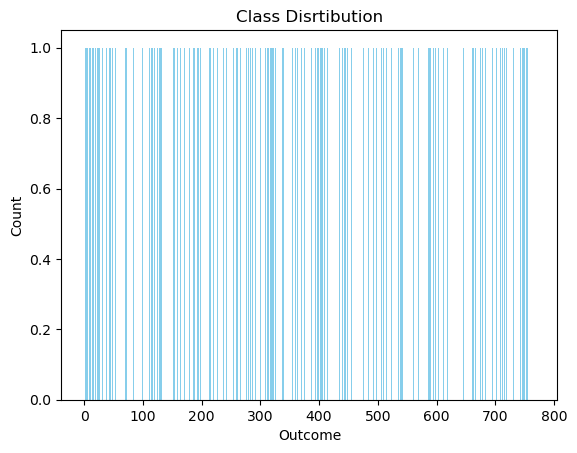

In [18]:
# Analyze the class distribution
class_counts = diabetes_data['Outcome'] # insert code here 
print("Class Distribution:")
print(class_counts)

# Visualize the class distribution
plt.bar(class_counts.index, class_counts.values, color='skyblue')
# insert code here 
plt.xlabel('Outcome')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis labe
plt.title("Class Disrtibution")
plt.show()

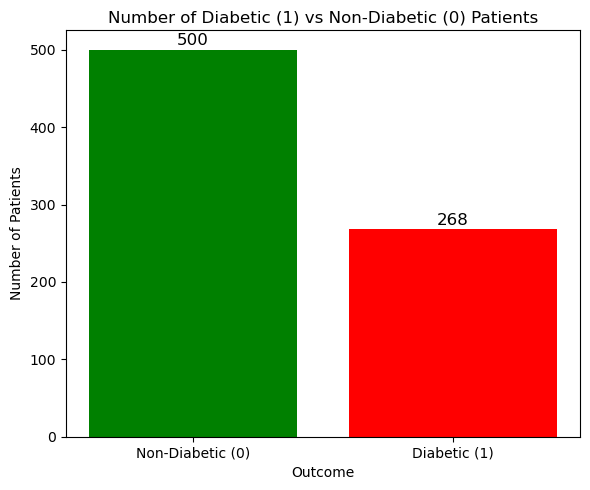

In [20]:
# Analyze class distribution
class_counts = diabetes_data['Outcome'].value_counts()

# Create bar plot with annotated counts
plt.figure(figsize=(6, 5))
bars = plt.bar(['Non-Diabetic (0)', 'Diabetic (1)'], class_counts.sort_index(), color=['green', 'red'])

# Annotate each bar with its count
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, str(int(height)), 
             ha='center', va='bottom', fontsize=12)

plt.xlabel('Outcome')
plt.ylabel('Number of Patients')
plt.title('Number of Diabetic (1) vs Non-Diabetic (0) Patients')
plt.tight_layout()
plt.show()

Correlation Matrix

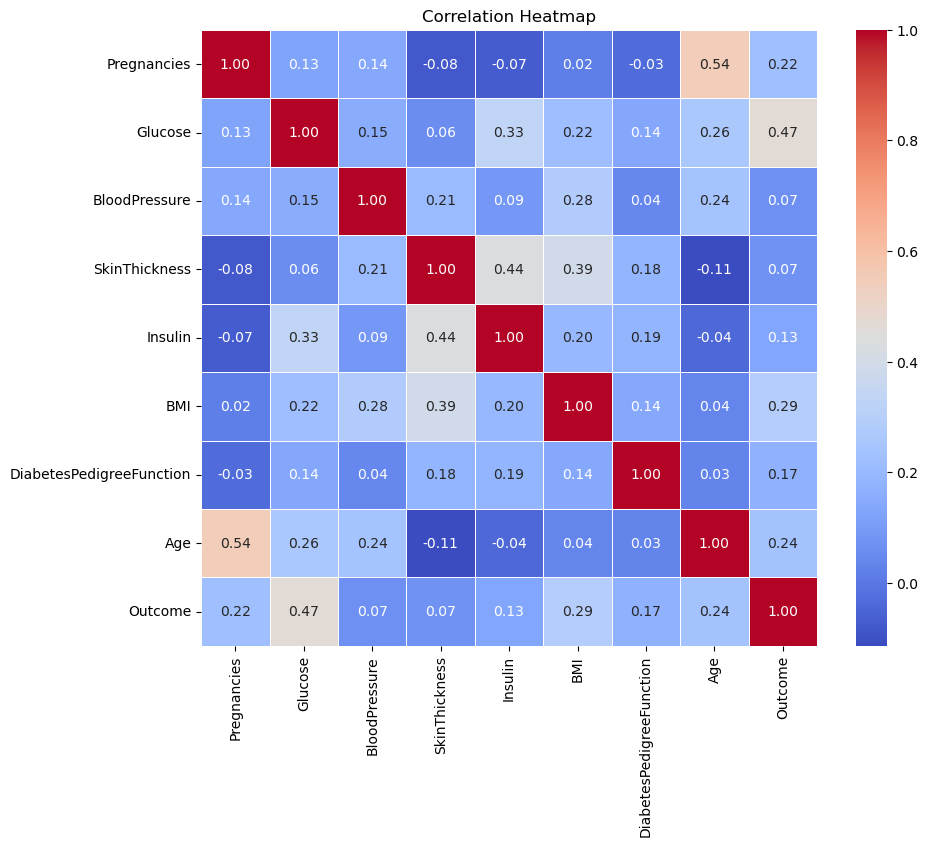

In [22]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = diabetes_data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Correlation of features with Outcome only

C:\Users\vemul\AppData\Local\Temp\ipykernel_18016\2652868198.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome_corr.values, y=outcome_corr.index, palette='coolwarm')


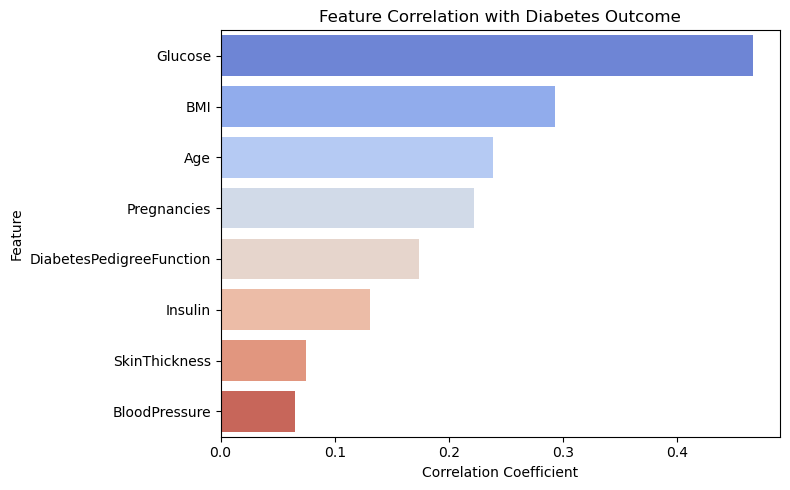

In [27]:
# Correlation of features with Outcome only
outcome_corr = corr_matrix['Outcome'].drop('Outcome').sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=outcome_corr.values, y=outcome_corr.index, palette='coolwarm')
plt.title('Feature Correlation with Diabetes Outcome')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Observation
From the full heatmap or bar chart:
1. Glucose has the strongest positive correlation with Outcome.
2. BMI, Age, and DiabetesPedigreeFunction also show moderate positive correlation.
3. BloodPressure, SkinThickness, Insulin often show weaker correlation.

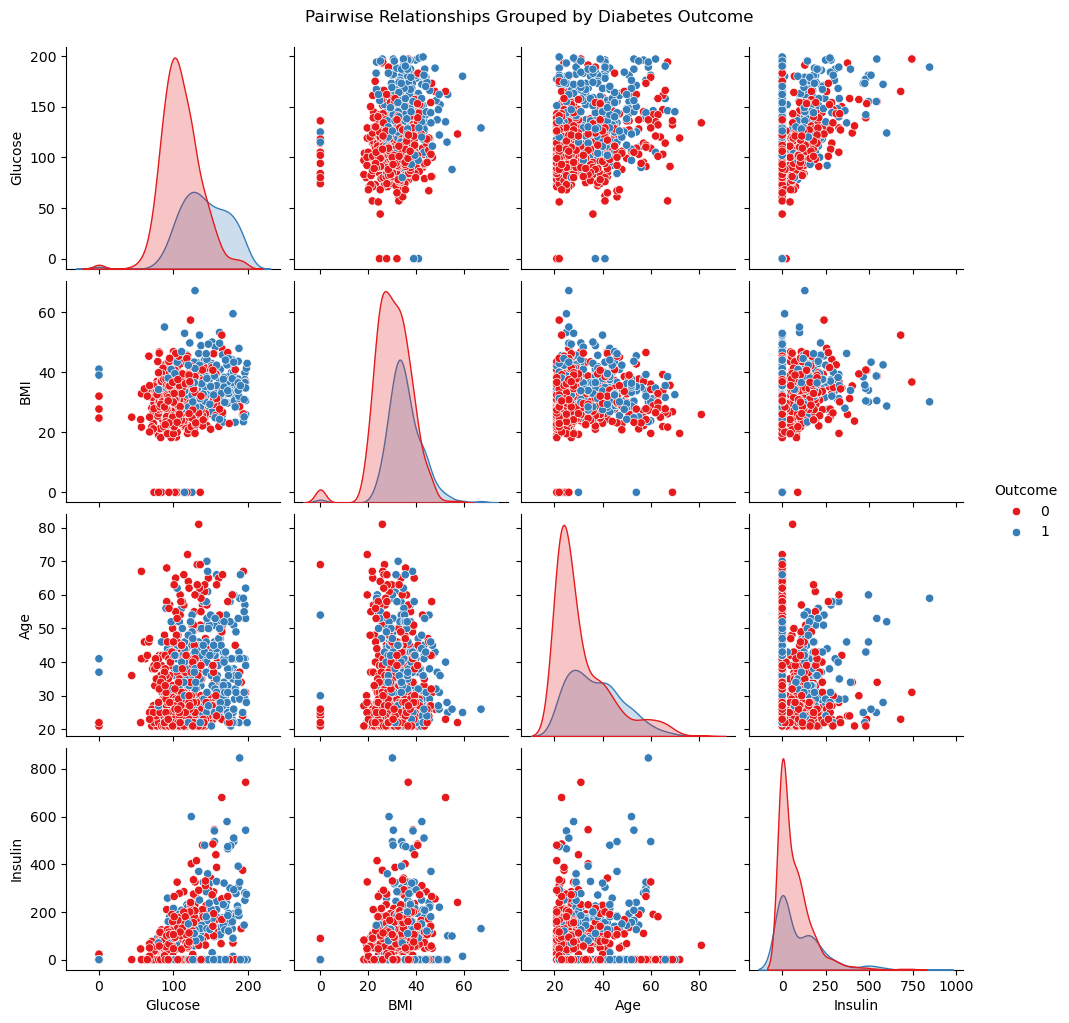

In [28]:
# Plot pairwise relationships of selected features, colored by Outcome
sns.pairplot(diabetes_data, vars=['Glucose', 'BMI', 'Age', 'Insulin'], hue='Outcome', palette='Set1')
plt.suptitle("Pairwise Relationships Grouped by Diabetes Outcome", y=1.02)
plt.show()


### Observations:
The image shows pairwise relationships of various health metrics (Glucose, BMI, Age, Insulin) grouped by diabetes outcome (0 for non-diabetic, 1 for diabetic), presented through scatter plots and histograms. Here's an interpretation of the results:

1. Glucose vs. Other Metrics:
   - The histogram of Glucose shows a wider distribution for diabetic individuals (red) compared to non-diabetic (blue), with a noticeable peak around 100-150 for diabetics, suggesting higher glucose levels are associated with diabetes.
   - Scatter plots (e.g., Glucose vs. BMI) show clusters where diabetic individuals (red) tend to have higher glucose levels, especially at higher BMI values.

2. BMI vs. Other Metrics:
   - The BMI histogram indicates a broader range for diabetics, with a peak around 30-40, while non-diabetics peak around 20-30, hinting at a link between higher BMI and diabetes.
   - Scatter plots (e.g., BMI vs. Age) show diabetic individuals (red) are more distributed across higher BMI values, particularly in older age groups.

3. Age vs. Other Metrics:
   - The Age histogram shows a similar distribution for both groups, with a peak around 20-30, but diabetics (red) are more prevalent in the 40-60 range, suggesting age as a risk factor.
   - Scatter plots (e.g., Age vs. Insulin) indicate that older diabetic individuals tend to have varying insulin levels.

4. Insulin vs. Other Metrics:
   - The Insulin histogram shows a skewed distribution, with diabetics (red) having a wider range and a peak around 100-200, while non-diabetics (blue) are more concentrated below 100, indicating higher insulin levels in diabetics.
   - Scatter plots (e.g., Insulin vs. Glucose) show a positive correlation between insulin and glucose levels, especially among diabetics.

**Overall Insight**: The data suggests that higher levels of glucose, BMI, and insulin, as well as older age, are associated with a diabetic outcome. The overlap between groups indicates that these metrics alone may not be definitive predictors but contribute to the risk when combined.

C:\Users\vemul\AppData\Local\Temp\ipykernel_18016\3707340860.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=diabetes_data, palette='coolwarm')
C:\Users\vemul\AppData\Local\Temp\ipykernel_18016\3707340860.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=diabetes_data, palette='coolwarm')
C:\Users\vemul\AppData\Local\Temp\ipykernel_18016\3707340860.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=diabetes_data, palette='coolwarm')
C:\Users\vemul\A

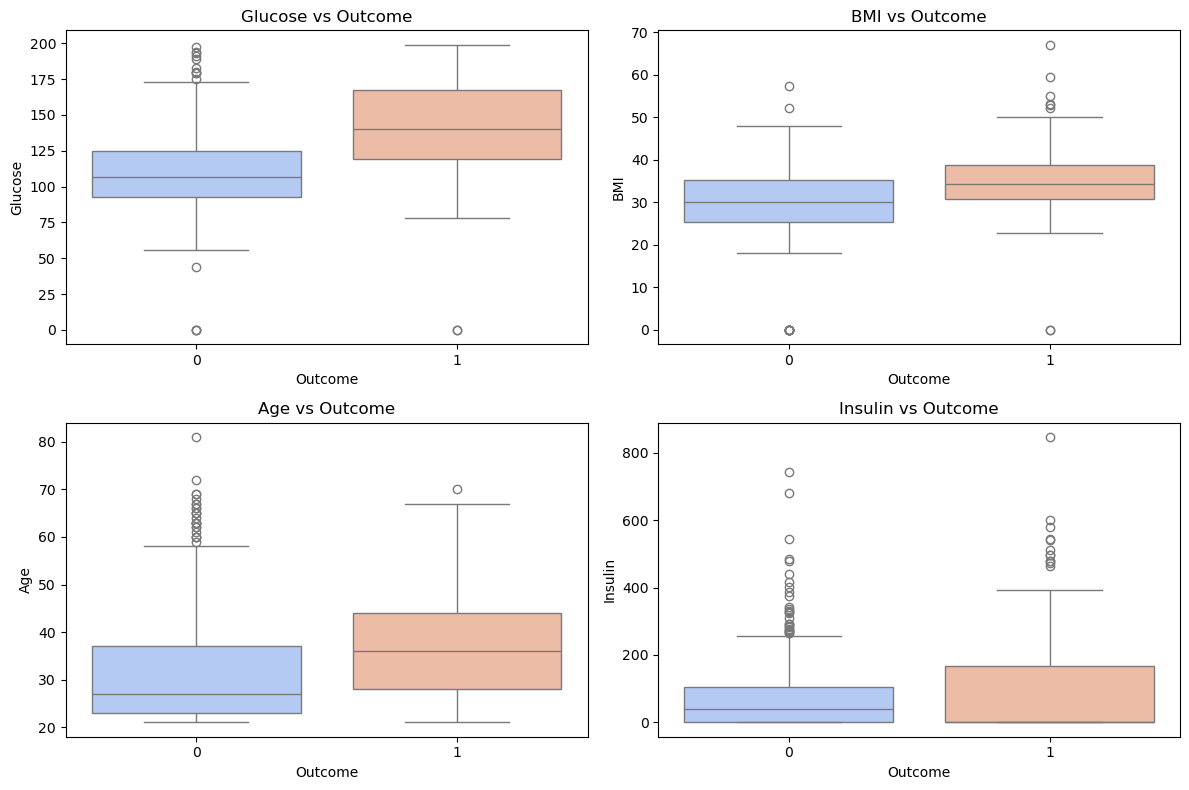

In [29]:
features = ['Glucose', 'BMI', 'Age', 'Insulin']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Outcome', y=feature, data=diabetes_data, palette='coolwarm')
    plt.title(f'{feature} vs Outcome')

plt.tight_layout()
plt.show()

### Observations:
The image shows box plots comparing the distribution of Glucose, BMI, Age, and Insulin levels between two outcome groups (0 for non-diabetic, 1 for diabetic). Here's an interpretation:

- **Glucose vs. Outcome**: Non-diabetics (0) have a median glucose level around 100-125, while diabetics (1) have a higher median around 150-175, with a wider spread, indicating higher and more variable glucose levels in diabetics.

- **BMI vs. Outcome**: Both groups have similar medians around 30-35, but diabetics (1) show a slightly wider range and more outliers, suggesting a broader distribution of BMI values among diabetics.

- **Age vs. Outcome**: Non-diabetics (0) and diabetics (1) have medians around 30-40, with similar spreads, though diabetics show more variability and some higher outliers, hinting at age as a potential factor.

- **Insulin vs. Outcome**: Non-diabetics (0) have a lower median insulin level around 100-200, while diabetics (1) have a higher median around 200-300, with a wider range and more outliers, indicating elevated insulin levels in diabetics.

**Overall Insight**: Diabetics tend to have higher median glucose and insulin levels compared to non-diabetics, with more variability. BMI and Age show less pronounced differences, though diabetics exhibit greater variability in these metrics.

## 3. Separating features and target

In [32]:
# Features and target variable
x = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split into training and testing sets with stratification
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

## 4. Standardize features (feature scaling)

In [33]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## 5. Apply SMOTE to the training data

In [34]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)

## 6. Visualizing class distribution after SMOTE

Before SMOTE:
Outcome
0    400
1    214
Name: count, dtype: int64

After SMOTE:
Outcome
0    400
1    400
Name: count, dtype: int64


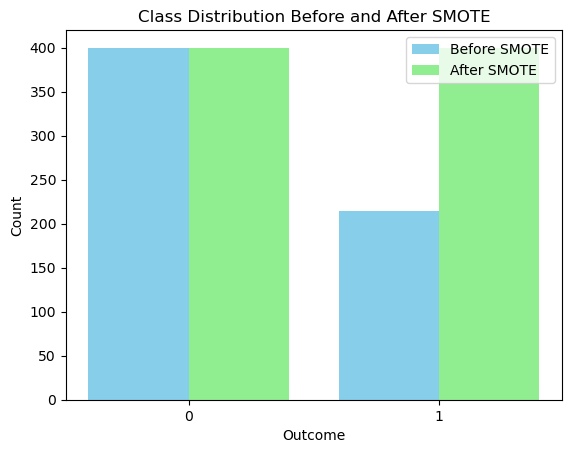

In [35]:
# Check the new class distribution
print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_smote.value_counts())

# Visualize the new class distribution
counts_before = y_train.value_counts()
counts_after = y_train_smote.value_counts()

plt.bar([0, 1], [counts_before.get(0, 0), counts_before.get(1, 0)], width=0.4, label='Before SMOTE', color='skyblue')
plt.bar([0.4, 1.4], [counts_after.get(0, 0), counts_after.get(1, 0)], width=0.4, label='After SMOTE', color='lightgreen')

plt.title('Class Distribution Before and After SMOTE')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['0', '1'])
plt.legend()
plt.show()

## 7. Initialize the logistic regression models

In [36]:
# Initialize the models
model_orig = LogisticRegression(solver='liblinear', max_iter=200)
model_smote =LogisticRegression(solver='liblinear', max_iter=200)

## 8. Train the models

In [37]:
# Train the model on original data
model_orig.fit(x_train_scaled, y_train)

# Train the model on SMOTE data
model_smote.fit(x_train_smote, y_train_smote)

LogisticRegression(max_iter=200, solver='liblinear')

## 9. Make predictions and prepare to evaluate models 

In [38]:
# Make predictions on the test set
y_pred_orig = model_orig.predict(x_test_scaled)
y_pred_smote = model_smote.predict(x_test_scaled)

# Predictions probability for ROC-AUC
y_prob_orig = model_orig.predict_proba(x_test_scaled)[:, 1]
y_prob_smote = model_smote.predict_proba(x_test_scaled)[:, 1]

# Evaluate the model's performance
def evaluate_model(y_test, y_pred, y_prob):
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("Precision:", round(precision_score(y_test, y_pred), 4))
    print("Recall:", round(recall_score(y_test, y_pred), 4))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 4))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

## 10. Evaluate the model on original data

In [39]:
print("Performance on Original Data:")
evaluate_model(y_test, y_pred_orig, y_prob_orig)

Performance on Original Data:
Accuracy: 0.7143
Precision: 0.6087
Recall: 0.5185
ROC-AUC: 0.8233

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



## 11. Evaluate the model on SMOTE-augmented data

In [40]:
print("Performance on SMOTE Augmented Data:")
evaluate_model(y_test, y_pred_smote, y_prob_smote)

Performance on SMOTE Augmented Data:
Accuracy: 0.7403
Precision: 0.6129
Recall: 0.7037
ROC-AUC: 0.8204

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79       100
           1       0.61      0.70      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



## 12. Visualize and compare model performance

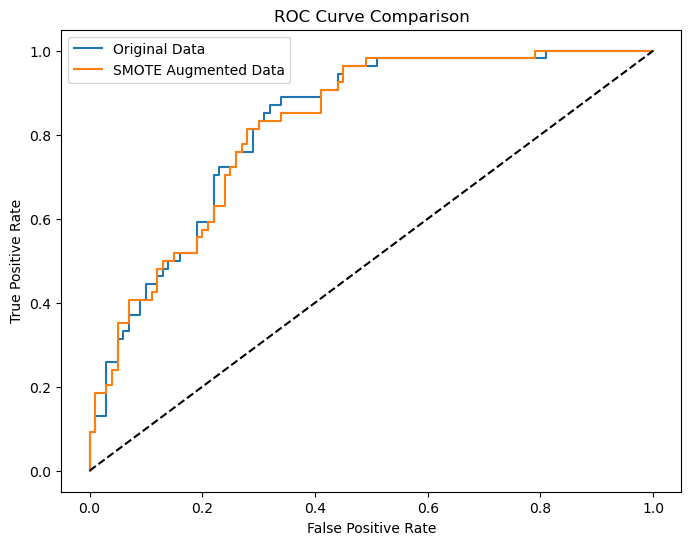

In [41]:
# Plot ROC curves
fpr_orig, tpr_orig, _ = roc_curve(y_test, y_prob_orig)
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_prob_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr_orig, tpr_orig, label='Original Data')
plt.plot(fpr_smote, tpr_smote, label='SMOTE Augmented Data')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

The image shows a Receiver Operating Characteristic (ROC) curve comparison between the original data (blue) and SMOTE (Synthetic Minority Oversampling Technique) augmented data (orange) for a binary classification task, likely related to diabetes outcome based on prior context. The diagonal dashed line represents the performance of a random classifier (area under the curve, AUC = 0.5).

- Original Data (Blue): The ROC curve rises steadily from (0,0) to (1,1), indicating moderate discriminative ability. The curve is above the diagonal, suggesting the model performs better than random guessing, with an AUC likely between 0.7 and 0.8.

- SMOTE Augmented Data (Orange): The ROC curve follows a similar path but appears slightly closer to the top-left corner (indicating higher True Positive Rate at lower False Positive Rates) and flattens near the top, suggesting improved performance. This implies that SMOTE augmentation enhances the model's ability to distinguish between classes, likely with a higher AUC (possibly 0.8-0.9).

**Overall Insight**: The SMOTE augmented data improves the model's classification performance compared to the original data, as evidenced by the ROC curve being closer to the ideal point (0,1). This suggests that addressing class imbalance through SMOTE leads to better sensitivity and specificity in predicting the outcome.